In [2]:

####################################################################################################
####################################################################################################

import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

import scipy as sp
import scipy.stats
from scipy.stats import poisson

from IPython.display import display

sys.path.append("../")

from pax_utils import pax_utils


In [5]:

####################################################################################################
####################################################################################################

#dir_fax      = os.path.abspath("./pax_output/fax_truth") + '/'
dir_fax      = os.path.abspath("./fax_temp") + '/'
file_out_pkl = 'merged/merged_fax_truth.pkl'


####################################################################################################
####################################################################################################

pax_utils.csvsToPkl(dir_fax, file_out_pkl)


####################################################################################################
####################################################################################################

df_pkl = pd.read_pickle(file_out_pkl)

print()
print("Fax Events: " + str(df_pkl.shape[0]))
display(df_pkl[0:10][:])
print()



Fax Events: 1920


,fax_truth_peak_id,event,g4_id,instruction,n_electrons,n_photons,peak_type,repetition,t_first_electron,t_first_photon,...,t_last_electron,t_last_photon,t_mean_electrons,t_mean_photons,t_sigma_electrons,t_sigma_photons,top_fraction,x,y,z
0,0,0,-1,0,17.0,358,s2,0,8.281723e+05,8.283727e+05,...,8.298557e+05,8.308442e+05,8.290207e+05,8.294046e+05,558.223936,597.859733,0.606145,4.499150,26.950078,-24.814994
1,1,1,-1,1,NaN,17,s1,0,NaN,6.550222e+05,...,NaN,6.551457e+05,NaN,6.550742e+05,NaN,31.286294,0.294118,2.626434,-17.960824,-57.456815
2,2,1,-1,1,37.0,847,s2,0,1.053462e+06,1.053612e+06,...,1.057498e+06,1.058351e+06,1.055579e+06,1.055959e+06,837.985743,880.484955,0.626919,2.437941,-16.671814,-57.456815
3,3,2,-1,2,16.0,322,s2,0,8.340757e+05,8.341499e+05,...,8.361486e+05,8.370086e+05,8.349208e+05,8.353060e+05,522.231651,539.535344,0.642857,-31.379093,-20.299274,-25.655845
4,4,3,-1,3,NaN,20,s1,0,NaN,6.550227e+05,...,NaN,6.551819e+05,NaN,6.550895e+05,NaN,38.248716,0.100000,10.907536,-6.312277,-57.780505
5,5,3,-1,3,32.0,734,s2,0,1.056593e+06,1.056760e+06,...,1.060073e+06,1.060602e+06,1.057807e+06,1.058132e+06,768.866951,810.056600,0.637602,10.126616,-5.860352,-57.780505
6,6,4,-1,4,NaN,1,s1,0,NaN,6.550435e+05,...,NaN,6.550435e+05,NaN,6.550435e+05,NaN,0.000000,0.000000,12.190372,-35.645256,-46.617485
7,7,4,-1,4,15.0,337,s2,0,9.788478e+05,9.790191e+05,...,9.821309e+05,9.830819e+05,9.805256e+05,9.809417e+05,779.578661,790.156405,0.590504,11.306292,-33.060162,-46.617485
8,8,5,-1,5,NaN,6,s1,0,NaN,6.550517e+05,...,NaN,6.551028e+05,NaN,6.550811e+05,NaN,18.078611,0.833333,24.631697,-12.763601,-34.074937
9,9,5,-1,5,45.0,1017,s2,0,8.923092e+05,8.924019e+05,...,8.948131e+05,8.956259e+05,8.934580e+05,8.938495e+05,652.355104,676.494983,0.594887,23.583515,-12.220457,-34.074937


In [5]:

####################################################################################################
####################################################################################################

arr_s1 = df_pkl.iloc[:]['s1_photons'].as_matrix()
arr_s2 = df_pkl.iloc[:]['s2_electrons'].as_matrix()


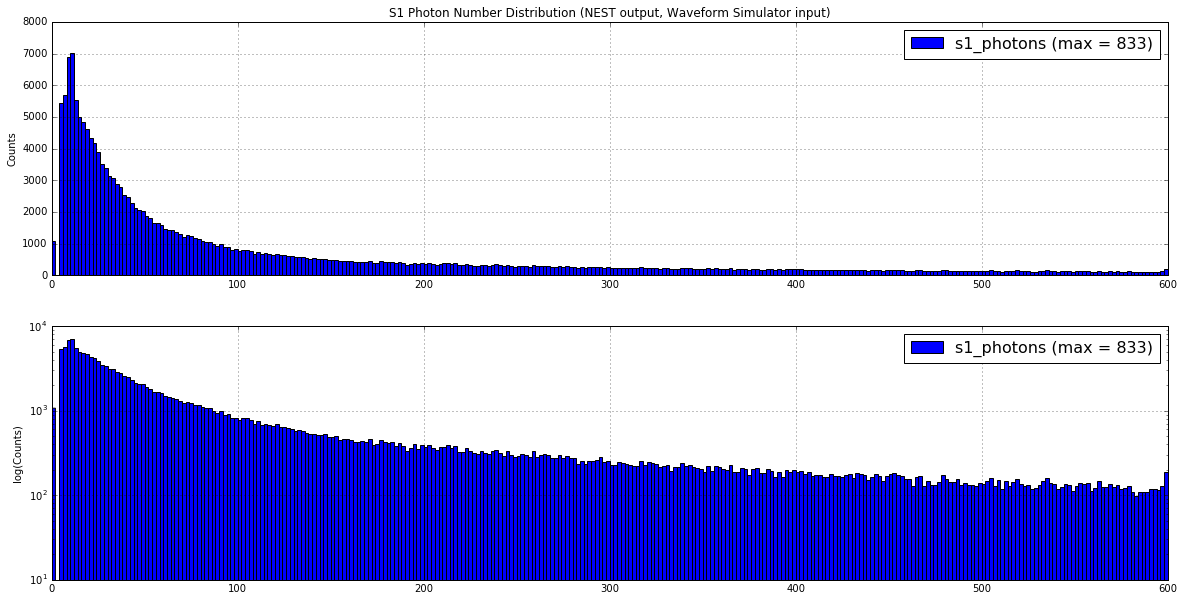

In [15]:

####################################################################################################
# Plot S1 photons
####################################################################################################

s1max = np.round(np.amax(arr_s1))

s1_overflow = 600
arr_s1_ovflw = arr_s1.copy()
arr_s1_ovflw[arr_s1_ovflw >= s1_overflow] = s1_overflow - 1
s1max_ovflw = np.round(np.amax(arr_s1_ovflw))
nbins = s1_overflow/2

#
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.hist(arr_s1, bins=nbins, range=[0, s1_overflow], color='b', label='s1_photons (max = %d)' % s1max)
plt.grid(True)
leg = plt.legend(fontsize=16)
plt.title('S1 Photon Number Distribution (NEST output, Waveform Simulator input)')
plt.ylabel('Counts')

plt.subplot(2, 1, 2)
plt.hist(arr_s1, bins=nbins, range=[0, s1_overflow], color='b', label='s1_photons (max = %d)' % s1max)
plt.grid(True)
leg = plt.legend(fontsize=16)
plt.yscale('log')
plt.ylabel('log(Counts)')

fig.savefig("plots/s1_number_distribution.png")

#print(arr_s1.shape)
#print(arr_s1_ovflw.shape)

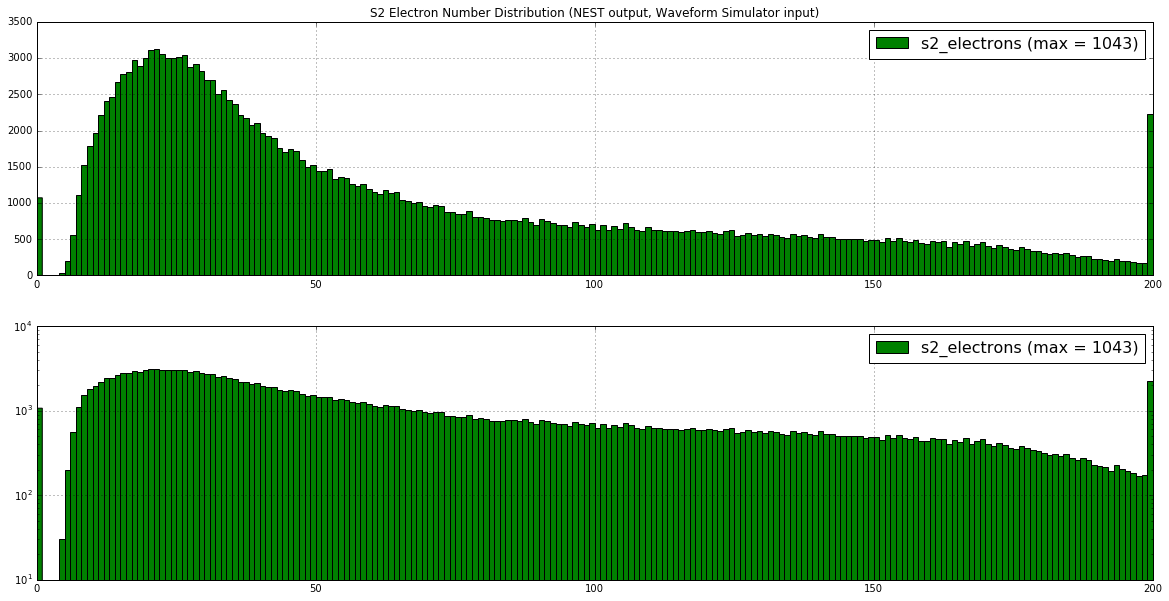

In [14]:

####################################################################################################
# Plot S2 electrons
####################################################################################################

s2max = np.round(np.amax(arr_s2))

s2_overflow = 200
arr_s2_ovflw = arr_s2.copy()
arr_s2_ovflw[arr_s2_ovflw >= s2_overflow] = s2_overflow - 1
s2max_ovflw = np.round(np.amax(arr_s2_ovflw))
nbins = 200

#
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.hist(arr_s2_ovflw, bins=nbins, range=[0, s2_overflow], color='g', label='s2_electrons (max = %d)' % s2max)
plt.grid(True)
plt.title('S2 Electron Number Distribution (NEST output, Waveform Simulator input)')
leg = plt.legend(fontsize=16)

plt.subplot(2, 1, 2)
plt.hist(arr_s2_ovflw, bins=nbins, range=[0, s2_overflow], color='g', label='s2_electrons (max = %d)' % s2max)
plt.grid(True)
leg = plt.legend(fontsize=16)

plt.yscale('log')
fig.savefig("plots/s2_number_distribution.png")

#print(arr_s2.shape)
#print(arr_s2_ovflw.shape)

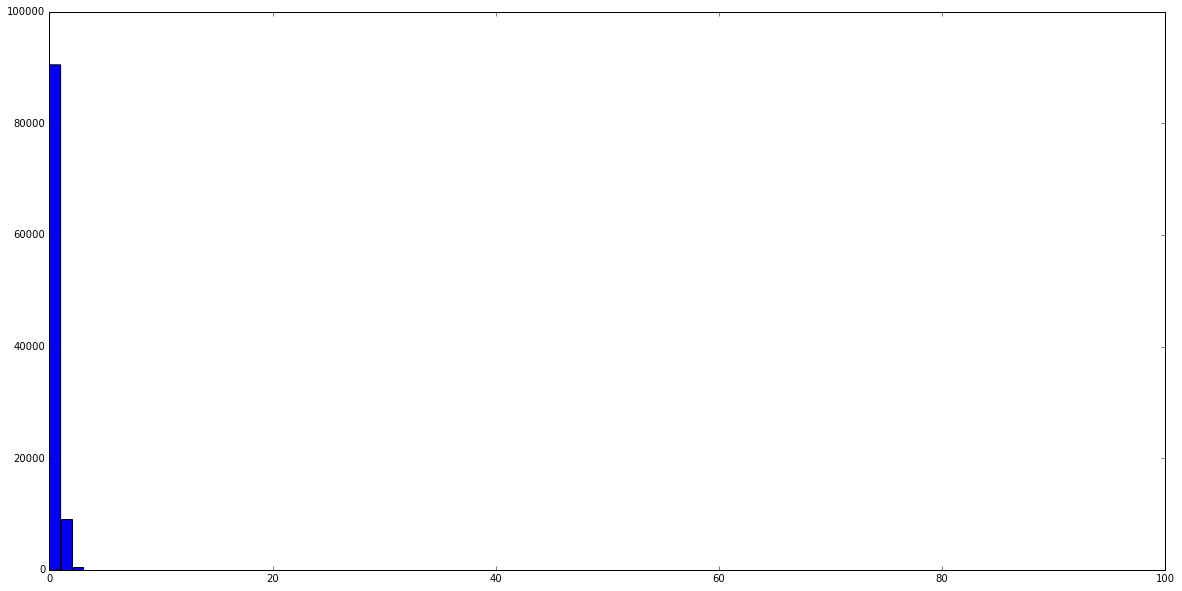

In [36]:

####################################################################################################
####################################################################################################

mu = 0.1

data = poisson.rvs(mu, size=100000)
#dist = poisson(mu)

#print(dist)

f = plt.figure(figsize=(20, 10))

h = plt.hist(data, bins=100, range=[0, 100])


#fit = poisson.fit(data, mu)